# Summation and Series
** December 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

A notebook exploring summnations, series, and the equivalent linear form. 

** Note: ** This notebook contains interactive elements and certain latex snippets that will not render in github markdown. 
You must run this notebook on your local Jupyter notebook environment for interactive elements or render or if you wish to render just the latex by using the url of this repo with the [online NBViewer](https://nbviewer.jupyter.org/).

## Libraries

In [548]:
import sympy as sp
import numpy as np
from IPython.display import display
from ipywidgets import interact
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from sympy import Matrix, solve_linear_system
sp.init_printing(order='lex',use_latex='mathjax')

## Three Forms

Here are three equivalent ways of representing the series of natural numbers:
1. Summnation notation.
2. Closed gaussian form. 
3. Linear form 

$$
\large\sum_{i=1}^{n}{i} = \frac{n(n+1)}{2} = 
\frac{
\begin{bmatrix}
1\\
1
\end{bmatrix}^\intercal
\begin{bmatrix}
n && n-1 && n-2 && \dots && 0 \\
0 && 1 && 2 && \dots&& n
\end{bmatrix}
\begin{bmatrix}
1&&1&&\dots&& n
\end{bmatrix}^\intercal}{2}
$$

The original gaussian intution for the closed form solution looked like the linear form, although it was not burdened down with the linear algebra tricks for summing each column, then adding the result of that. These linear methods seemed to come natural to gauss. Here are the implementations of the three equivalent definitions. 

In [93]:
def summnation(n):
    sum = 0
    for i in range(n+1):
        sum += i
    return sum

def gaussianForm(n):
    return (n*(n+1))/2

def linearForm(n):
    colVec = np.matrix([1,1])
    rowVec = np.matrix(np.ones(n+1)).T
    nVec = np.arange(0,n+1)
    nMat = [nVec,np.flip(nVec,0)]
    
    return (colVec*nMat)*rowVec/2

In [92]:
testN = 40
eqCheck = summnation(testN) == gaussianForm(testN) == int(linearForm(testN))

print("Do the three methods produce the same result: {0}".format(eqCheck))

Do the three methods produce the same result: True


## Modifying the closed form.

One aspect of mathematics I enjoy is that when we have a representation in terms of variables, it is natural to ask what happens when we change them. For example, what if we modify the closed form so that the constants are also variables: 

$$
\large\frac{n(n+\mathbf{k})}{\mathbf{z}}
$$

How does changing $\mathbf{k}$ and $\mathbf{z}$ change what series we are computing? How can we think of this intuitively? For the moment we will keep $\mathbf{z}=2$. Such that: 

$$
\large\frac{n(n+\mathbf{k})}{2}
$$

When $\mathbf{k}=1$ we get the sum of the natural numbers up to and including $n$. Or:

$$
\large\sum_{i=1}^{n}{i}
$$

What about when When $\mathbf{k}=2$? In order to explore these questions we define a function that allows us to change the linear form and explore different closed forms. 

In [318]:
def lfShift(n,shiftVal,printOut=True):
    colVec = np.matrix([1,1])
    rowVec = np.matrix(np.ones(n+1)).T
    nVec = np.arange(0,n+1)
    nMat = [nVec,np.arange(n+shiftVal,-1+shiftVal,-1)]
    
    if printOut:
        display(sp.Matrix(nMat))

    return (colVec*nMat)*rowVec/2

def generalForm(n,k,z,m):
    return (n*(n+k) + m) / z

def exploreShifting(shiftMagnitude,k=1,z=2,m=0):
    n = sp.symbols('n')
    norm = ((n*(n + k))/z) + (m/z)
    print("norm:")
    display(norm)
    
    print("n = 4, with shift = {0}".format(shiftMagnitude))
    lfShift(3,shiftMagnitude)
    print("{0:<2} | {1:<5}  |  {2:<5} | sh-norm".format("i","sh","norm"))
    print("-------------------------------")
    for i in range(1,11):
        shiftVal = float(lfShift(i,shiftMagnitude,False))
        normVal  = generalForm(i,k,z,m)
        print("{0:<2} | {1:<5}  |  {2:<5} | {3:<5}".format(i,shiftVal,normVal, shiftVal-normVal))

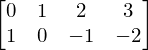

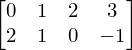

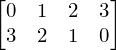

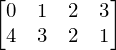

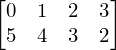

matrix([[ 10.]])

In [334]:
lfShift(3,-2)
lfShift(3,-1)
lfShift(3,0)
lfShift(3,1)
lfShift(3,2)

norm:


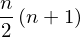

n = 4, with shift = 0


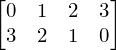

i  | sh     |  norm  | sh-norm
-------------------------------
1  | 1.0    |  1.0   | 0.0  
2  | 3.0    |  3.0   | 0.0  
3  | 6.0    |  6.0   | 0.0  
4  | 10.0   |  10.0  | 0.0  
5  | 15.0   |  15.0  | 0.0  
6  | 21.0   |  21.0  | 0.0  
7  | 28.0   |  28.0  | 0.0  
8  | 36.0   |  36.0  | 0.0  
9  | 45.0   |  45.0  | 0.0  
10 | 55.0   |  55.0  | 0.0  


In [326]:
exploreShifting(0,1,2,0)

norm:


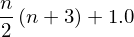

n = 4, with shift = 2


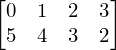

i  | sh     |  norm  | sh-norm
-------------------------------
1  | 3.0    |  3.0   | 0.0  
2  | 6.0    |  6.0   | 0.0  
3  | 10.0   |  10.0  | 0.0  
4  | 15.0   |  15.0  | 0.0  
5  | 21.0   |  21.0  | 0.0  
6  | 28.0   |  28.0  | 0.0  
7  | 36.0   |  36.0  | 0.0  
8  | 45.0   |  45.0  | 0.0  
9  | 55.0   |  55.0  | 0.0  
10 | 66.0   |  66.0  | 0.0  


In [329]:
#interact(exploreShifting,shiftMagnitude=[-10,10],k=[-10,10],z=[-10,10])
exploreShifting(2,3,2,2)

We derive the following from experimenting with the utilities above: 

$$
\large\frac{n(n+1+s)+s}{2} =  \frac{n(n+1)}{2}+\frac{s(n+1)}{2} = \sum_{i=1}^{n}{i+s} = \sum_{i=1}^{n}{i}+\sum_{i=1}^{n}{s}
$$

Thus multiplying the the bottom row by some constant is equivalent to adding that constant in a summnation. What if instead we apply some function to the bottom vector. I.e. 

$$
f(
\begin{bmatrix}
n && n-1 && n-2 && \dots && 0 
\end{bmatrix},z(x))=
\begin{bmatrix}
z(n) && z(n-1) && z(n-2) && \dots && z(0)
\end{bmatrix}
$$

In the above case we have $z(x)=x*c$

What about when z in non-linear. I.e. $z(x)= x^2$

$$
f(
\begin{bmatrix}
n && n-1 && n-2 && \dots && 0 
\end{bmatrix},z(x)=x^2)=
\begin{bmatrix}
n^2 && (n-1)^2 && (n-2)^2 && \dots && 0
\end{bmatrix}
$$

In [484]:
def funcRow(n,fn,printOut=True):
    colVec = np.matrix([1,1])
    rowVec = np.matrix(np.ones(n+1)).T
    nVec = np.arange(0,n+1)
    revRange = np.arange(n,-1,-1)
    fnApply = np.apply_along_axis(fn,0,revRange)
    nMat = [nVec,fnApply]
    
    if printOut:
        display(sp.Matrix(nMat))

    return (colVec*nMat)*rowVec/2

def sumVect(n):
    summ = 0
    outLs = []
    for i in range(1,n+1):
        summ += i
        outLs = outLs+[summ]
    return np.matrix(outLs)

def exploreFuncting( rowFn, normFn):
    n = sp.symbols('n')
    norm = normFn(n)
    print("norm:")
    display(norm)
    
    print("n = 4, with function")
    x= sp.symbols('x')
    display(rowFn(x))
    funcRow(3,rowFn)
    print("{0:<2} | {1:<5}  |  {2:<5} | fn-norm".format("i","fn","norm"))
    print("-------------------------------")
    for i in range(1,15):
        shiftVal = float(funcRow(i,rowFn,False))
        normVal  = normFn(i)
        print("{0:<2} | {1:<5}  |  {2:<5} | {3:<5}".format(i,shiftVal,normVal, shiftVal-normVal))

In [485]:
normFun = lambda n:(n*(n+1))/2 
rowFun = lambda x:x*x
exploreFuncting(rowFun,normFun)

norm:


n⋅(n + 1)
─────────
    2    

n = 4, with function


 2
x 

⎡0  1  2  3⎤
⎢          ⎥
⎣9  4  1  0⎦

i  | fn     |  norm  | fn-norm
-------------------------------
1  | 1.0    |  1.0   | 0.0  
2  | 4.0    |  3.0   | 1.0  
3  | 10.0   |  6.0   | 4.0  
4  | 20.0   |  10.0  | 10.0 
5  | 35.0   |  15.0  | 20.0 
6  | 56.0   |  21.0  | 35.0 
7  | 84.0   |  28.0  | 56.0 
8  | 120.0  |  36.0  | 84.0 
9  | 165.0  |  45.0  | 120.0
10 | 220.0  |  55.0  | 165.0
11 | 286.0  |  66.0  | 220.0
12 | 364.0  |  78.0  | 286.0
13 | 455.0  |  91.0  | 364.0
14 | 560.0  |  105.0 | 455.0


This is an interesting result. As we see, the fn column is a sum of the norm column!

$$
\large f(n) = \frac{n(n+1)}{2} \\
\sum_{i=1}^{n}{f(i)} = \frac{n(n+1)}{2} + \frac{(n-1)(n-2)}{2} + \frac{(n-3)(n-2)}{2} + \frac{(n-4)(n-3)}{2} + \dots + \frac{(n-n+1)(n-n+1+1)}{2}=\\
\frac{
\begin{bmatrix}
1\\
1
\end{bmatrix}^\intercal
\begin{bmatrix}
n^2 && (n-1)^2 && (n-2)^2 && \dots && 0 \\
0 && 1 && 2 && \dots&& n
\end{bmatrix}
\begin{bmatrix}
1&&1&&\dots&& n
\end{bmatrix}^\intercal}{2}
$$

In [670]:
def squaredBot(x,displaySymbolic=True,simplify=False):
    gaussFn = lambda n:(n*(n+1))/2 

    nLs = []
    symbolicRes = gaussFn(0)
    n = sp.symbols('n')
    nCap = x+1
    
    for f in range(1,nCap):
        symbolicRes+=gaussFn(n-f)
    
    if displaySymbolic:
        if simplify:
            display(sp.simplify(symbolicRes))
        else:
            display(symbolicRes)
        
    return lambdify(n,symbolicRes)(x)

for i in range(1,10):
    print(squaredBot(i,simplify=False))

n⋅(n - 1)
─────────
    2    

0.0


n⋅(n - 1)   (n - 2)⋅(n - 1)
───────── + ───────────────
    2              2       

1.0


n⋅(n - 1)   (n - 3)⋅(n - 2)   (n - 2)⋅(n - 1)
───────── + ─────────────── + ───────────────
    2              2                 2       

4.0


n⋅(n - 1)   (n - 4)⋅(n - 3)   (n - 3)⋅(n - 2)   (n - 2)⋅(n - 1)
───────── + ─────────────── + ─────────────── + ───────────────
    2              2                 2                 2       

10.0


n⋅(n - 1)   (n - 5)⋅(n - 4)   (n - 4)⋅(n - 3)   (n - 3)⋅(n - 2)   (n - 2)⋅(n -
───────── + ─────────────── + ─────────────── + ─────────────── + ────────────
    2              2                 2                 2                 2    

 1)
───
   

20.0


n⋅(n - 1)   (n - 6)⋅(n - 5)   (n - 5)⋅(n - 4)   (n - 4)⋅(n - 3)   (n - 3)⋅(n -
───────── + ─────────────── + ─────────────── + ─────────────── + ────────────
    2              2                 2                 2                 2    

 2)   (n - 2)⋅(n - 1)
─── + ───────────────
             2       

35.0


n⋅(n - 1)   (n - 7)⋅(n - 6)   (n - 6)⋅(n - 5)   (n - 5)⋅(n - 4)   (n - 4)⋅(n -
───────── + ─────────────── + ─────────────── + ─────────────── + ────────────
    2              2                 2                 2                 2    

 3)   (n - 3)⋅(n - 2)   (n - 2)⋅(n - 1)
─── + ─────────────── + ───────────────
             2                 2       

56.0


n⋅(n - 1)   (n - 8)⋅(n - 7)   (n - 7)⋅(n - 6)   (n - 6)⋅(n - 5)   (n - 5)⋅(n -
───────── + ─────────────── + ─────────────── + ─────────────── + ────────────
    2              2                 2                 2                 2    

 4)   (n - 4)⋅(n - 3)   (n - 3)⋅(n - 2)   (n - 2)⋅(n - 1)
─── + ─────────────── + ─────────────── + ───────────────
             2                 2                 2       

84.0


n⋅(n - 1)   (n - 9)⋅(n - 8)   (n - 8)⋅(n - 7)   (n - 7)⋅(n - 6)   (n - 6)⋅(n -
───────── + ─────────────── + ─────────────── + ─────────────── + ────────────
    2              2                 2                 2                 2    

 5)   (n - 5)⋅(n - 4)   (n - 4)⋅(n - 3)   (n - 3)⋅(n - 2)   (n - 2)⋅(n - 1)
─── + ─────────────── + ─────────────── + ─────────────── + ───────────────
             2                 2                 2                 2       

120.0


In [725]:
def recCont(n):
    return recF(n+1)/2

def recF(n):
    if n <= 2:
        return n
    else:
        #print(n,n-1)
        return recF(n-1)+n*(n-1)
    
print(recCont(4))

20.0


In [733]:
def nfunc(n):
    return (n**4+2*n**3+3*n**2+2*n)

In [734]:
for i in range(1,10):
    print(nfunc(i))

8
48
168
440
960
1848
3248
5328
8280


In [633]:
def tstFn(x):
    return (x**3)/2 + (x*(x+2))/2 - (x*3)/2

for i in range(1,9):
    print(tstFn(i)-squaredBot(i,displaySymbolic=False))

-0.5
1.0
6.5
18.0
37.5
67.0
108.5
164.0


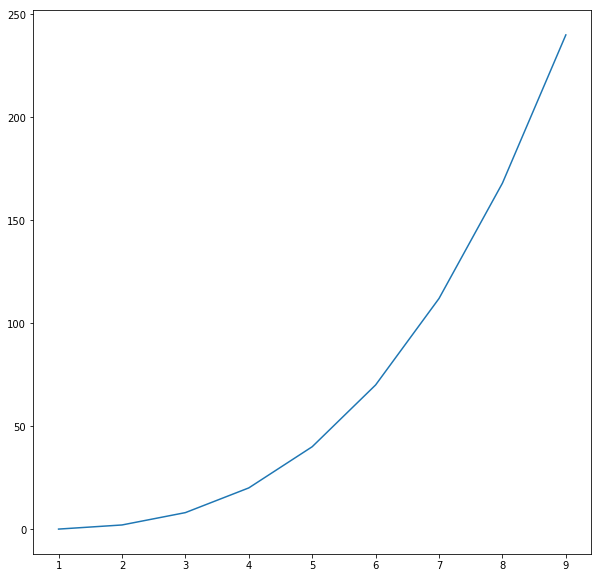

In [547]:
ys = np.array([0,2,8,20,40,70,112,168,240])
xs = np.array([1,2,3,4,5,6,7,8,9])

plt.figure(figsize=(10,10))
plt.plot(xs,ys)
plt.show()


In [582]:
a,b,c = sp.symbols('a b c')
#system = Matrix(( (9, 3, 1,8), (16, 4, 1,20),(25,5,1,40),(36,6,1,70)))
system = Matrix(( (16, 4, 1,20),(25,5,1,40),(36,6,1,70)))
a = [sp.Eq(a*4+b*2+c,2),sp.Eq(a*9+b*3+c,8),sp.Eq(a*16+b*4+c,20)]
sp.solve(a)

{a: 3, b: -9, c: 8}

## Using sympy

In [ ]:
$$
\large\sum_{i=1}^{n}{i-\frac{1}{2}}=\frac{n^2}{2}  
$$


In [384]:
165 - 120

In [ ]:
 I'm interested in exploring various matricies and their relationship to the gaussian closed form.